<a href="https://colab.research.google.com/github/shiqisim/Final-Project/blob/main/final_project_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Neural Networks: Deep Learning on a public dataset


#1. Introduction


Breast cancer is a common disease that has affected numerous women around the world. It is often not easy to detect if one has breast cancer in the early stages as there may not be any symptoms. Hence, it is important for early detection to occur to prevent further deaths. This disease happens when there is lining cells of the ducts or lobules in the glandular tissue of the breast [1]. This type of cancer has a high treatment rate if detected early and before the cancerous cells spread to the other parts of the body.

In 2020, 2.3 million women were diagnosed with breast cancer and there were 685000 deaths around the world. This reflects how common this type of cancer is as it could occur at any age after puberty for women. Males could contract breast cancer too, but such cases are significantly lesser than the probability of a female contracting it. Statistics have shown how the survival rate of breast cancer for at least five years are more than 90% in high income countries, 66% in India and 40% in South Africa [1]. As a result, this project seeks to develop a deep learning model to assist the lower income countries with detecting the risk of one contracting breast cancer and to get treatment earlier. Healthcare systems should also be put in place in managing breast cancer cases through ‘referral pathways World Health Organisation [2021]’ to ease the complications surrounding it.

The aim of this project is to develop a deep learning model that explores multiple algorithms for predicting whether one is at a risk of getting breast cancer and to implement the best algorithm. For example, Convolutional Neural Networks (CNN), Artificial Neural Network (ANN) and Residual Neural Network (RNN). Subsequently, it should also classify, detect and conduct segmentation on the breast ultrasound images for predicting breast cancer, as well as perform evaluation on the different machine learning models.
The objectives would be to develop an original model with suitable depth, deliver a clear and concise analysis that is well documented, as well as an evaluation on the different models created.

#2. Defining the problem and assembling a dataset

This dataset, ""(Kaggle,) includes the medical images of breast cancer from ultrasound scans and it is categorised into three classes. They are malignant, benign and normal images. This data was collected in 2018 and the patients are aged between 25 and 75 years old and there are 600 person in total. The dataset consists of 780 images with an average image size of 500*500 pixels and in PNG format. The ground truth images are presented with original images. Hence, I would like to explore and perform segmentation of the ultrasound images to predict whether one has breast cancer. The data availability is sufficient for me to conduct segmentation of the images based on the three classes. The ground truth accuracy was also verified by the radiologists from Baheya and the incorrect annotation was fixed.

The problem about this dataset, however, is that it is a multi-class segmentation with single-label classification and the data is imbalanced. Thus, for the last-layer activation, I would be using 'softmax' and 'categorical_crossentropy' for the loss function. The input features would be all the images from the benign, normal and malignant class and the output would be the predictions of image that has been converted from categorical to numerical data using the one hot encoding technique. To resolve the imbalanced issue, class weights would be added during training.


#3. Choosing a measure of success

The metric of success for this model would be precision, recall, balanced accuracy score and f1-score. 'Precision is a metric that quantifies the number of correct positive predictions made.' (https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/) 'It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.' (https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/) As for recall, it is 'a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made' (https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/) It 'provides an indication of missed positive predictions' (https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/) which is often 'used to measure the coverage of the minority class' (Page 27, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.). These two metrics are chosen with reference to the Deep Learning with Python book whereby it was stated that 'For
class-imbalanced problems, you can use precision and recall.' With  cross-validation with another source, it is evident that these two metrics are often used in classification models. (Javatpoint, no date)

Additionally, the balanced accuracy sccore is chosen as it is widely used in multiclass classification and issues of an imbalanced dataset. The definition for it is calculated as the average of recall in each class. Lastly, the f1-measure is selected as a metric in this project as it can 'combine both precision and recall into a single measure that captures both properties' (https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/). 'The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data.' Hence, this shows that this metric is useful for this imbalanced dataset and would aid me in the evaluation process. To determine the results of the metric, the best result would be defined as 1.0 and the worst would be 0.0.

#4. Deciding on an evaluation protocol

The evaluation protocols that I had chosen for this project would be maintaining a hold-out validation set and doing K-fold cross-validation. 'Hold-out is when you split up your dataset into a 'train' and 'test' set.' (https://medium.com/@jaz1/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f) 'The training set is what the model is trained on, and the test set is used to see how well that model performs on unseen data. ' (https://medium.com/@jaz1/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f) The splitting of the training and testing set would be '80% of data for training and the remaining 20% of the data for testing' (https://medium.com/@jaz1/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f)

On the other hand, for K-fold cross-validation, 'the procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into'. (https://machinelearningmastery.com/k-fold-cross-validation/) I have chosen this method as it is stated that it is 'simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split' (https://machinelearningmastery.com/k-fold-cross-validation/) In general, out of the groups, one would be used as test set whilst the reemaining would be the train set. 'The model is trained on the training set and scored on the test set.' (Eijaz, 2018)

The advantage of using the K-fold cross validation is that it is useful for data that is limited and prevents overfitting. The disadvantage, however, would be that it is computationally intensive as it will train and test the model continuously. For hold-out validation, the advantage would be that it has lesser computation costs, good for large datasets and building of first model. The disadvantage would be that it is highly dependent on the train and test split unlike the cross-validation methods which can train on 'multiple train-test splits' (https://medium.com/@jaz1/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f).


#5. Preparing your data

In [ ]:
pip install scikit-learn==1.1.2

In [ ]:
import numpy as np
import pandas as pd

# mount gdrive, required for downloaded dataset (or sql data dump)
import os
from google.colab import drive
drive.mount("/content/drive")

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow import keras
import cv2
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall, AUC

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import LSTM,Bidirectional,Reshape
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
No GPU, using /device:CPU:0.


In [ ]:
# project name
os.environ["PROJECT_NAME"] = "breast-cancer"

# set folder paths in gdrive for the coursework
os.environ["CODER_HOME"] = "/content"
os.environ["PROJECTS"] = os.getenv("CODER_HOME") + "/project"
os.environ["PROJECT_HOME"] = os.getenv("PROJECTS") + "/" + os.getenv("PROJECT_NAME")
os.environ["DATA_PATH"] = os.getenv("PROJECT_HOME") + "/data"
os.environ["SCRIPT_PATH"] = os.getenv("PROJECT_HOME") + "/scripts"

# heirachically create project folders in local if not exist
!mkdir -p $CODER_HOME
!mkdir -p $PROJECTS
!mkdir -p $PROJECT_HOME
!mkdir -p $DATA_PATH
!mkdir -p $SCRIPT_PATH

# set folder paths on gdrive for the coursework
os.environ["GD_COURSE_HOME"] = "/content/drive/MyDrive/data"
os.environ["GD_PROJECT_HOME"] = os.getenv("GD_COURSE_HOME") + "/" + os.getenv("PROJECT_NAME")
os.environ["GD_DATA_PATH"] = os.getenv("GD_PROJECT_HOME") + "/data"
os.environ["GD_SCRIPT_PATH"] = os.getenv("GD_PROJECT_HOME") + "/scripts"

# heirachically create project folders in gdrive if not exist
!mkdir -p $GD_COURSE_HOME
!mkdir -p $GD_PROJECT_HOME
!mkdir -p $GD_DATA_PATH
!mkdir -p $GD_SCRIPT_PATH

In [ ]:
!ls -d $PROJECT_HOME/*

/content/project/breast-cancer/data  /content/project/breast-cancer/scripts


In [ ]:
# defining file path
filePath = "/content/drive/MyDrive/data/breast-cancer/Dataset_BUSI_with_GT"
dirList = [os.path.join(filePath,i) for i in os.listdir(filePath)]
size_dict = {}
for i,value in enumerate(dirList):
    size_dict[os.listdir(filePath)[i]] = len(os.listdir(value))
size_dict


{'normal': 266, 'malignant': 421, 'benign': 891}

In [ ]:
# printing df information
df = pd.DataFrame(os.listdir(dirList[0]))
print(df.info)

<bound method DataFrame.info of                          0
0          normal (10).png
1    normal (100)_mask.png
2    normal (102)_mask.png
3           normal (1).png
4         normal (100).png
..                     ...
261        normal (99).png
262         normal (9).png
263   normal (93)_mask.png
264   normal (91)_mask.png
265        normal (97).png

[266 rows x 1 columns]>


In [ ]:
# printing df information
df = pd.DataFrame(os.listdir(dirList[1]))
print(df.info)

<bound method DataFrame.info of                            0
0          malignant (1).png
1         malignant (10).png
2    malignant (10)_mask.png
3     malignant (1)_mask.png
4        malignant (109).png
..                       ...
416       malignant (99).png
417       malignant (97).png
418  malignant (95)_mask.png
419       malignant (95).png
420       malignant (96).png

[421 rows x 1 columns]>


In [ ]:
# printing df information
df = pd.DataFrame(os.listdir(dirList[2]))
print(df.info)

<bound method DataFrame.info of                           0
0            benign (1).png
1     benign (105)_mask.png
2          benign (105).png
3     benign (100)_mask.png
4     benign (104)_mask.png
..                      ...
886  benign (98)_mask_1.png
887    benign (98)_mask.png
888    benign (94)_mask.png
889         benign (95).png
890    benign (95)_mask.png

[891 rows x 1 columns]>


In [ ]:
# defining the img_size and img_channel properties
imageSize = 150
imageChannel = 3
X_benign , Xm_benign , y_benign = np.zeros((446,imageSize,imageSize,imageChannel)) , np.zeros((446,imageSize,imageSize,imageChannel)) , np.full(446,'benign')
X_normal , Xm_normal , y_normal = np.zeros((133,imageSize,imageSize,imageChannel)) , np.zeros((133,imageSize,imageSize,imageChannel)) , np.full(133,'normal')
X_malignant , Xm_malignant , y_malignant = np.zeros((210,imageSize,imageSize,imageChannel)) , np.zeros((210,imageSize,imageSize,imageChannel)) , np.full(210,'malignant')

In [ ]:
image1 = os.path.join(os.path.join(filePath,'benign'),os.listdir(os.path.join(filePath,'benign'))[1])

rgbImage = load_img(image1,color_mode = 'rgb',target_size=(imageSize,imageSize))
img = img_to_array(rgbImage)
imageShape = img.shape
print(imageShape)

def imageNum(filename):


    val = 0

    for i in range(len(filename)) :
        if filename[i] == '(' :
            while True :
                i += 1
                if filename[i] == ')' :
                    break
                val = (val*10) + int(filename[i])
            break

    return val

for tumorPath in dirList :
    for image in os.listdir(tumorPath) :
        p = os.path.join(tumorPath, image)
        # load image as to be grayscale and resize image
        rgbImage = load_img(p,color_mode = 'rgb',target_size=(imageSize,imageSize))
        if image[-5] == ')' :                                   #if real image

            if image[0] == 'b' :
              # If image is correct, append it to X to be either benign, normal or malignant
                X_benign[imageNum(image)-1]+= img_to_array(rgbImage)
            if image[0] == 'n' :
                X_normal[imageNum(image)-1]+= img_to_array(rgbImage)
            if image[0] == 'm' :
                X_malignant[imageNum(image)-1]+= img_to_array(rgbImage)
        #load masked image if not correct
        else :
          # add masked image to y
            if image[0] == 'b' :
                Xm_benign[imageNum(image)-1]+= img_to_array(rgbImage)
            if image[0] == 'n' :
                Xm_normal[imageNum(image)-1]+= img_to_array(rgbImage)
            if image[0] == 'm' :
                Xm_malignant[imageNum(image)-1]+= img_to_array(rgbImage)

(150, 150, 3)


In [ ]:
# concatenate the different layers: malignant, benign and normal
X = np.concatenate((X_benign, X_normal, X_malignant), axis = 0)
Xm = np.concatenate((Xm_benign, Xm_normal, Xm_malignant), axis = 0)
y = np.concatenate((y_benign, y_normal, y_malignant), axis = 0)

print(X.shape)
print(Xm.shape)
print(y.shape)
X /= 255.0
Xm /= 255.0

print(X.max())
print(Xm.min())

(789, 150, 150, 3)
(789, 150, 150, 3)
(789,)
1.0
0.0


In [ ]:
# convert categorical to numerical data
encoder  = OneHotEncoder()

y=encoder.fit_transform(y.reshape(y.shape[0],1))


# splitting into test and training set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle=True,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42,stratify = y_train.toarray())
Xm_train,Xm_test,ym_train,ym_test = train_test_split(Xm,y,test_size = 0.2,shuffle=True,random_state=42,stratify=y.toarray())
Xm_train,Xm_val,ym_train,ym_val = train_test_split(Xm_train,ym_train,test_size=0.2,random_state=42,stratify = ym_train.toarray())

class_list = encoder.categories_
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(473, 150, 150, 3) (158, 150, 150, 3)
(473, 3) (158, 3)


#6. Developing a model that does better than a baseline

In [ ]:
# tumorCounts =

In [ ]:
# naiveBaseline =

In [ ]:
# get maximum value of y_train set & estimate class weights of unbalanced dataset
labels = np.argmax(y_train.toarray(), axis=1)
weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
CLASS_WEIGHT = dict(enumerate(weights))

CLASS_WEIGHT

In [ ]:
# INPUT_DIMENSION = X_train.shape[1]
# OUTPUT_CLASSES = y_train.shape[1]


# OPTIMIZER = 'adam'
# LOSS_FUNC = 'categorical_crossentropy'
# METRICS = ['categorical_accuracy',
#            Precision(name='precision'),
#            Recall(name='recall'),
#            AUC(name='auc', multi_label=True)]


# EARLY_STOP = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=5, verbose=0)

In [ ]:
# # baseline model
# baselineModel = Sequential(
#     [
#         Dense(3, activation='softmax', input_shape=(150,150,3))
#     ]
# )

# baselineModel._name = 'Baseline'
# baselineModel_initial_weights = baselineModel.get_weights()

# baselineModel.summary()

In [ ]:
# learning_rate = 0.01

# baselineModel.compile(optimizer=Adam(learning_rate=learning_rate),
#                  loss=LOSS_FUNC, metrics=METRICS)

In [ ]:
# EPOCHS = 10
# batch_size= 16

# # setting custom weights to be baseline_initial_weightss
# baselineModel.set_weights(baselineModel_initial_weights)

# baselineModel_history = baselineModel.fit(X_train, y_train.toarray(),
#                                 class_weight=CLASS_WEIGHT,
#                                 batch_size=batch_size, epochs=EPOCHS,
#                                 validation_data=(X_test, y_test),
#                                 callbacks=[EARLY_STOP],
#                                 verbose=0)

In [ ]:
base_model = tf.keras.applications.ResNet50(
                include_top=False,
                weights="imagenet",
                input_tensor=None,
                input_shape=imageShape,
                pooling=None,
            )
for layer in base_model.layers:
    layer.trainable = False

X_feat_out = base_model.output
X_feat_flatten = Flatten()(X_feat_out)

X_feat_model = Model(inputs = base_model.input,outputs = X_feat_flatten)
X_feat_train = X_feat_model.predict(X_train)
X_feat_val = X_feat_model.predict(X_val)
X_feat_test = X_feat_model.predict(X_test)

Xm_feat_train = X_feat_model.predict(Xm_train)
Xm_feat_val = X_feat_model.predict(Xm_val)
Xm_feat_test = X_feat_model.predict(Xm_test)

5/5 [==============================] - 13s 2s/step


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import LSTM,Bidirectional,Reshape
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix

In [ ]:
df = pd.DataFrame(columns = ['classifier',"Precision", "recall", "f1_measure", "confusionMatrix", "train_accuracy","val_accuracy","test_accuracy"])

In [ ]:
def eval(classifier_name,y_train,y_train_pred,y_val,y_val_pred,y_true,y_pred):
    y_train = np.argmax(y_train,axis=1)
    y_val = np.argmax(y_val,axis=1)
    y_true = np.argmax(y_true,axis=1)

    train_accuracy = round(accuracy_score(y_train,y_train_pred),4)
    val_accuracy = round(accuracy_score(y_val,y_val_pred),4)
    test_accuracy = round(accuracy_score(y_true,y_pred),4)
    f1_measure = round(f1_score(y_true,y_pred,average='weighted'),4)
    recall = round(recall_score(y_true,y_pred,average='weighted'),4)
    precision = round(precision_score(y_true,y_pred,average='weighted'),4)
    confusionMatrix = confusion_matrix(y_true,y_pred)

    score = {"classifier":classifier_name,"precision: ":precision,"recall: ":recall, "f1_measure: ":f1_measure, "confusionMatrix: ":confusionMatrix, "train_accuracy: ":train_accuracy, "val_accuracy: ":val_accuracy,"test_accuracy: ":test_accuracy}

    df.loc[len(df.index)] = score.values()
    for e,a in score.items():
        print(e,a)
    print("--"*20)

In [ ]:
def classifier_eval(classifier,classifier_name,X_train,y_train,X_val,y_val,X_test,y_test):

    classifier.fit(X_train,np.argmax(y_train,axis=1))

    y_train_pred = classifier.predict(X_train)
    y_val_pred = classifier.predict(X_val)
    y_test_pred = classifier.predict(X_test)

    eval(classifier_name,y_train,y_train_pred,y_val,y_val_pred,y_test,y_test_pred)

In [ ]:
names = ['SVM',
    'KNN',
    'ANN'
        ]

classifier = [
    SVC(),
    KNeighborsClassifier(),
    MLPClassifier(max_iter = 400),
]

cls_list = zip(names,classifier)
clsm_list = zip(names,classifier)

In [ ]:
for n,c in cls_list:
    classifier_eval(c,n,X_feat_train,y_train.toarray(),X_feat_val,y_val.toarray(),X_feat_test,y_test.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classifier SVM
precision:  0.2963
recall:  0.5443
f1_measure:  0.3837
confusionMatrix:  [[86  0  0]
 [48  0  0]
 [24  0  0]]
train_accuracy:  0.5708
val_accuracy:  0.5696
test_accuracy:  0.5443
----------------------------------------
classifier KNN
precision:  0.6242
recall:  0.6329
f1_measure:  0.6265
confusionMatrix:  [[63 18  5]
 [13 30  5]
 [12  5  7]]
train_accuracy:  0.797
val_accuracy:  0.6076
test_accuracy:  0.6329
----------------------------------------
classifier ANN
precision:  0.6786
recall:  0.6392
f1_measure:  0.6125
confusionMatrix:  [[57 28  1]
 [ 7 41  0]
 [13  8  3]]
train_accuracy:  0.7167
val_accuracy:  0.6456
test_accuracy:  0.6392
----------------------------------------


In [ ]:
def resnet():

    model = Sequential()
    model.add(base_model)

    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

    return model

In [ ]:
from sklearn.metrics import f1_score,roc_auc_score,cohen_kappa_score
def evaluation(model,X_train,y_train,X_val,y_val,X_test,y_test,history):
    train_loss , train_acc = model.evaluate(X_train,y_train.toarray())
    val_loss, val_acc = model.evaluate(X_val,y_val.toarray())
    test_loss_value , test_accuracy = model.evaluate(X_test, y_test.toarray())
    y_pred = model.predict(X_test)
    y_pred_label = np.argmax(y_pred,axis=1)
    y_true_label = np.argmax(y_test,axis=1)
    f1_measure = f1_score(y_true_label,y_pred_label,average='weighted')
    roc_score = roc_auc_score(y_test.toarray(),y_pred)

    print("Train accuracy = "+str(train_acc))
    print("Validation accuracy = "+str(val_acc))
    print('Test accuracy = ' + str(test_accuracy))
    print("f1_measure = "+str(f1_measure))
    print("roc_area = "+str(roc_score))

In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss):

    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()

In [ ]:
def fit_evaluate(model,X_train,y_train,X_test,y_test,bs,Epochs,patience):
    es = EarlyStopping(monitor='val_loss', mode='min', patience=patience,restore_best_weights=True, verbose=1)
    X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify = y_train.toarray())
    history = model.fit(X1_train,y1_train.toarray(),batch_size = bs,epochs=Epochs,validation_data = (X_val,y_val.toarray()), callbacks=[es])
    evaluation(model,X1_train,y1_train,X_val,y_val,X_test,y_test,history)
    Train_Val_Plot(history.history['acc'],history.history['val_acc'],history.history['loss'],history.history['val_loss'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 batch_normalization_1 (Batc  (None, 51200)            204800    
 hNormalization)                                                 
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 batch_normalization_2 (Batc  (None, 51200)            204800    
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 256)              

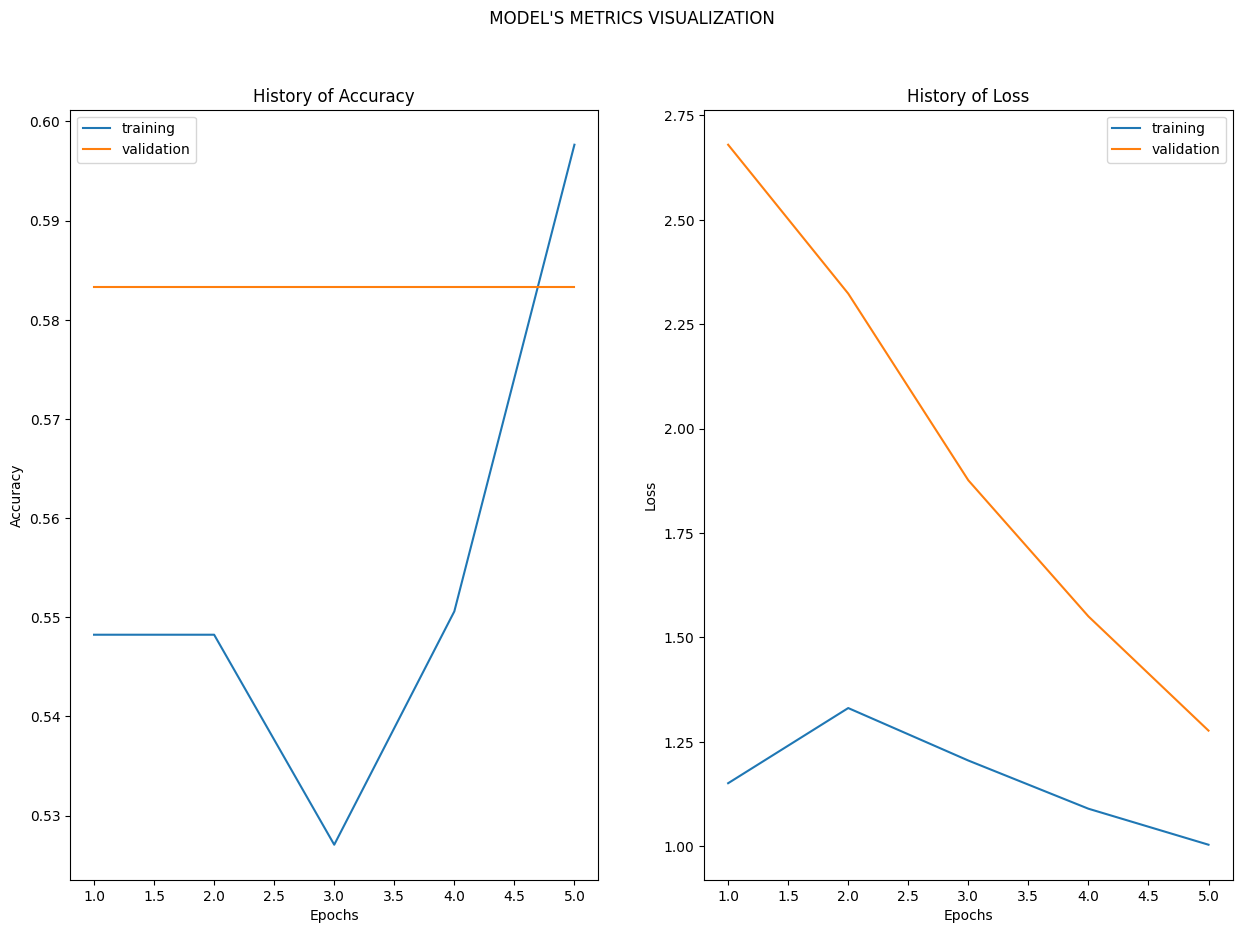

In [ ]:
model = resnet()
model.summary()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,5,4)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 batch_normalization_3 (Batc  (None, 51200)            204800    
 hNormalization)                                                 
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 batch_normalization_4 (Batc  (None, 51200)            204800    
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 256)              

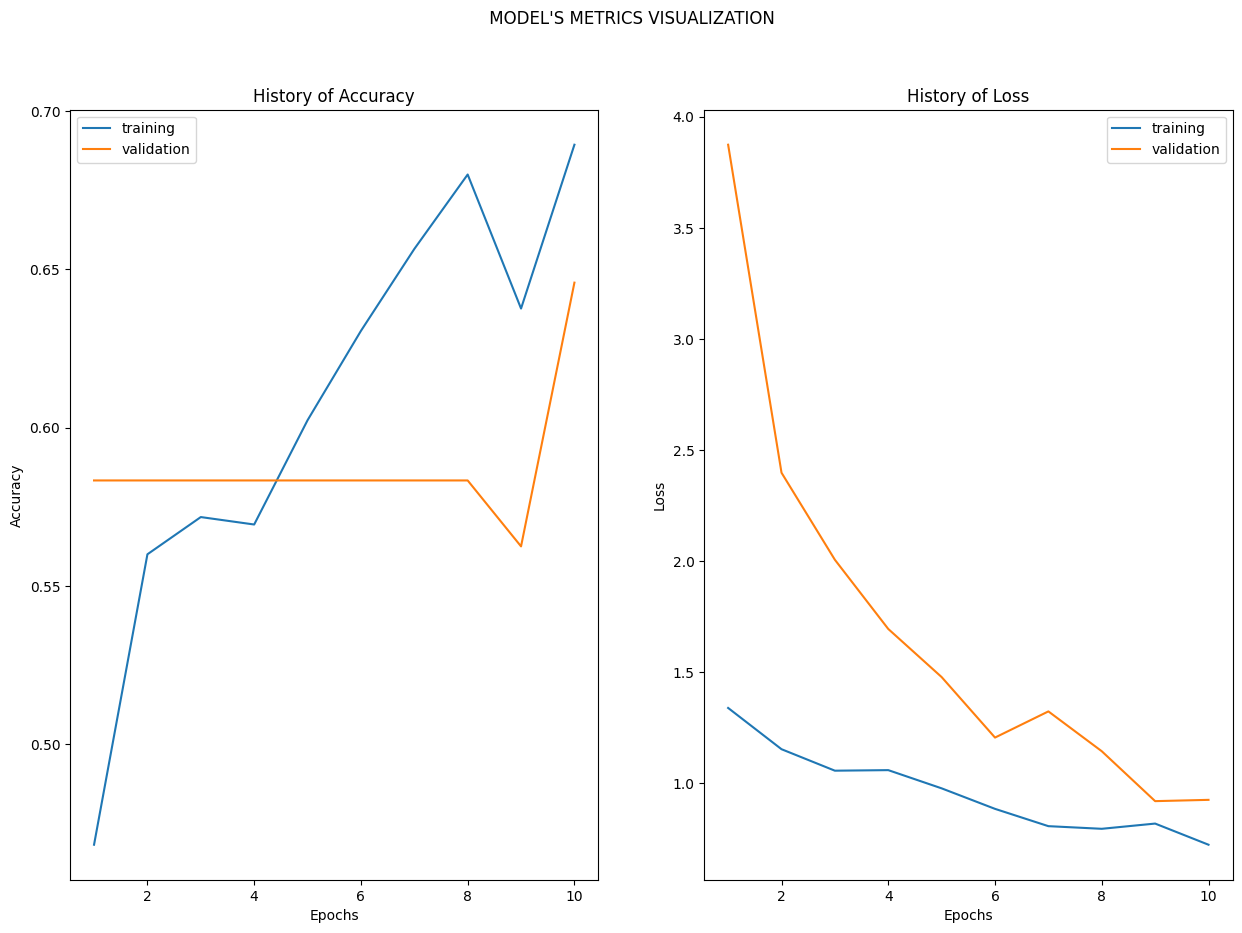

In [ ]:
model = resnet()
model.summary()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,10,4)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 51200)             0         
                                                                 
 batch_normalization_5 (Batc  (None, 51200)            204800    
 hNormalization)                                                 
                                                                 
 flatten_7 (Flatten)         (None, 51200)             0         
                                                                 
 batch_normalization_6 (Batc  (None, 51200)            204800    
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 256)              

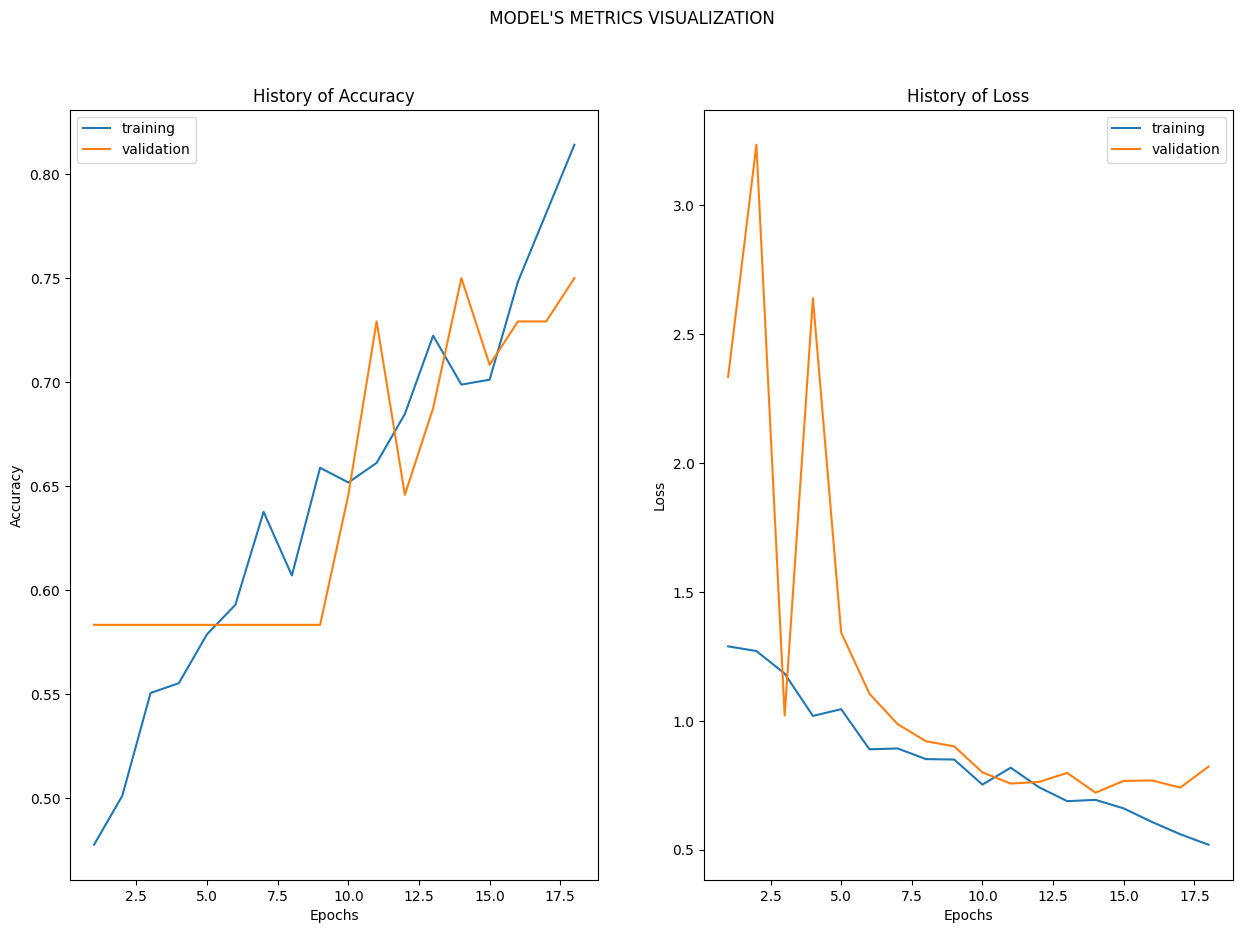

In [ ]:
model = resnet()
model.summary()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,20,4)